# Kaggle Project 8 - Tabular Classification with Reservation Cancellation Data

## Prepared by: Dwaipayan Mukherjee (2211569, AIA - AIML)

## About the Project:

Customer behavior and booking possibilities have been radically changed by online hotel reservation channels. Cancellations or no-shows cause a significant number of hotel reservations to be canceled. Cancellations can be caused by a variety of factors, such as scheduling conflicts, changes in plans, etc. In many cases, this is made easier by the possibility of doing so free or at a low cost, which is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Reservation Cancellation Prediction dataset. Feature distributions are close to, but not exactly the same, as the original.

The target variable is `booking_status` that indicates if the booking was cancelled or not. The aim is to predict whether a customer cancels a reservation or not. The evaluation metric is **Area Under the ROC Curve**.

## 1. Necessary Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve, auc
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import catboost

Loading the train, test, original and submission data as Pandas Dataframes.

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
original = pd.read_csv('train__dataset.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [5]:
test.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [6]:
original.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


## 2. Dealing with missing values:

In [7]:
print("\nMissing Values in Training set:\n")
print(train.isna().sum())

print("\n Missing Values in Test set:\n")
print(test.isna().sum())

print("\n Missing Values in Original set:\n ")
print(original.isna().sum())


Missing Values in Training set:

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

 Missing Values in Test set:

id                                      0
no_of_adults                            0
no_of_children                          

There are no missing values in the three datasets.

## 3. Understanding the data:

### 3.1 Summary Statistics:

In [8]:
train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,42100.0,21049.500000,12153.367503,0.0,10524.75,21049.50,31574.25,42099.0
no_of_adults,42100.0,1.920713,0.524950,0.0,2.00,2.00,2.00,4.0
no_of_children,42100.0,0.141093,0.450128,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,42100.0,0.884632,0.885693,0.0,0.00,1.00,2.00,7.0
no_of_week_nights,42100.0,2.398005,1.427330,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,42100.0,0.239192,0.587674,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,42100.0,0.025249,0.156884,0.0,0.00,0.00,0.00,1.0
room_type_reserved,42100.0,0.428931,0.832605,0.0,0.00,0.00,1.00,6.0
lead_time,42100.0,103.888029,81.069343,0.0,37.00,93.00,155.00,443.0
arrival_year,42100.0,2017.856295,0.350795,2017.0,2018.00,2018.00,2018.00,2018.0


In [9]:
test.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,28068.0,56133.500000,8102.678014,42100.0,49116.75,56133.50,63150.25,70167.0
no_of_adults,28068.0,1.915313,0.526279,0.0,2.00,2.00,2.00,4.0
no_of_children,28068.0,0.140872,0.447277,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,28068.0,0.888770,0.878250,0.0,0.00,1.00,2.00,6.0
no_of_week_nights,28068.0,2.387559,1.403213,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,28068.0,0.234110,0.581256,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,28068.0,0.027006,0.162103,0.0,0.00,0.00,0.00,1.0
room_type_reserved,28068.0,0.430668,0.830187,0.0,0.00,0.00,1.00,6.0
lead_time,28068.0,103.845554,81.134833,0.0,37.00,92.00,154.00,443.0
arrival_year,28068.0,2017.856705,0.350380,2017.0,2018.00,2018.00,2018.00,2018.0


In [10]:
original.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,18137.0,1.846777,0.516020,0.0,2.0,2.00,2.00,4.0
no_of_children,18137.0,0.107515,0.408901,0.0,0.0,0.00,0.00,9.0
no_of_weekend_nights,18137.0,0.811104,0.873470,0.0,0.0,1.00,2.00,7.0
no_of_week_nights,18137.0,2.208965,1.426365,0.0,1.0,2.00,3.00,17.0
type_of_meal_plan,18137.0,0.318465,0.629140,0.0,0.0,0.00,0.00,3.0
required_car_parking_space,18137.0,0.031648,0.175066,0.0,0.0,0.00,0.00,1.0
room_type_reserved,18137.0,0.336770,0.772865,0.0,0.0,0.00,0.00,6.0
lead_time,18137.0,85.377405,86.611736,0.0,17.0,57.00,127.00,443.0
arrival_year,18137.0,2017.820698,0.383616,2017.0,2018.0,2018.00,2018.00,2018.0
arrival_month,18137.0,7.432762,3.076999,1.0,5.0,8.00,10.00,12.0


### 3.2 Unique Value Counts of the columns:

In [11]:
print(" \n Unique Value Counts in Train data: \n")
for i in train.columns:
    print(f' {i} : {train[i].nunique()}')

print(" \n Unique Value Counts in Test Data: \n")
for i in test.columns:
    print(f' {i} : {test[i].nunique()}')
    
print(" \n Unique Value Counts in Original Data: \n")
for i in original.columns:
    print(f' {i} : {original[i].nunique()}')

 
 Unique Value Counts in Train data: 

 id : 42100
 no_of_adults : 5
 no_of_children : 6
 no_of_weekend_nights : 8
 no_of_week_nights : 18
 type_of_meal_plan : 4
 required_car_parking_space : 2
 room_type_reserved : 7
 lead_time : 338
 arrival_year : 2
 arrival_month : 12
 arrival_date : 31
 market_segment_type : 5
 repeated_guest : 2
 no_of_previous_cancellations : 10
 no_of_previous_bookings_not_canceled : 42
 avg_price_per_room : 2286
 no_of_special_requests : 6
 booking_status : 2
 
 Unique Value Counts in Test Data: 

 id : 28068
 no_of_adults : 5
 no_of_children : 6
 no_of_weekend_nights : 7
 no_of_week_nights : 18
 type_of_meal_plan : 4
 required_car_parking_space : 2
 room_type_reserved : 7
 lead_time : 334
 arrival_year : 2
 arrival_month : 12
 arrival_date : 31
 market_segment_type : 5
 repeated_guest : 2
 no_of_previous_cancellations : 9
 no_of_previous_bookings_not_canceled : 47
 avg_price_per_room : 2058
 no_of_special_requests : 6
 
 Unique Value Counts in Original Data:

### 3.3 Unique Values of Categorical Columns:

The categorical columns are `type_of_meal_plan`, `required_car_parking_space`, `room_type_reserved`, `market_segment_type` and `repeated_guest`.

In [12]:
cat_col = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved','market_segment_type', 'repeated_guest']

print("\n Unique Values of Categorical Variables in Train data: \n")
for i in cat_col:
    print(f' {i} : {train[i].unique()}')
    
print("\n Unique Values of Categorical Variables in Test data: \n")
for i in cat_col:
    print(f' {i} : {test[i].unique()}')

print("\n Unique Values of Categorical Variables in Original data: \n")
for i in cat_col:
    print(f' {i} : {original[i].unique()}')


 Unique Values of Categorical Variables in Train data: 

 type_of_meal_plan : [1 0 2 3]
 required_car_parking_space : [0 1]
 room_type_reserved : [0 2 3 1 4 5 6]
 market_segment_type : [1 0 2 3 4]
 repeated_guest : [1 0]

 Unique Values of Categorical Variables in Test data: 

 type_of_meal_plan : [0 2 1 3]
 required_car_parking_space : [0 1]
 room_type_reserved : [1 0 3 2 4 5 6]
 market_segment_type : [1 0 2 3 4]
 repeated_guest : [0 1]

 Unique Values of Categorical Variables in Original data: 

 type_of_meal_plan : [0 1 2 3]
 required_car_parking_space : [0 1]
 room_type_reserved : [0 1 4 3 2 5 6]
 market_segment_type : [1 0 2 4 3]
 repeated_guest : [0 1]


## 4. Exploratory Data Analysis:

First I set the color.

In [13]:
colors = sns.cubehelix_palette()

### 4.1 Distribution of `booking_status` (target) column:

([<matplotlib.patches.Wedge at 0x242cfdd61c0>,
 [Text(-0.5670163249303715, 0.9425987944308307, '0: Not Cancelled'),
  Text(0.5670163249303717, -0.9425987944308306, '1: Cancelled')],
 [Text(-0.30928163178020257, 0.5141447969622712, '67.2%'),
  Text(0.30928163178020274, -0.5141447969622712, '32.8%')])

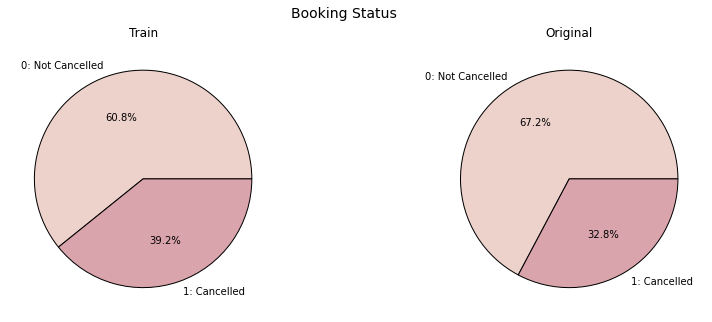

In [14]:
# figure, axes
fig, ax = plt.subplots(1, 2, figsize=(14,5))
# figure title
fig.suptitle('Booking Status', fontsize=14)

# train / original Stroke differences
ax[0].set_title('Train')
ax[1].set_title('Original')
plot_data_train = train['booking_status'].value_counts()
plot_data_original = original['booking_status'].value_counts()
plot_labels_train = plot_data_train.rename(index={0:'0: Not Cancelled', 1:'1: Cancelled'}).index
plot_labels_original = plot_data_original.rename(index={0:'0: Not Cancelled', 1:'1: Cancelled'}).index
ax[0].pie(plot_data_train, labels=plot_labels_train, autopct='%1.1f%%', colors=colors, wedgeprops = dict(edgecolor='black'))
ax[1].pie(plot_data_original, labels=plot_labels_original, autopct='%1.1f%%', colors=colors, wedgeprops = dict(edgecolor='black'))

The Train dataset represents the Original Dataset quite well. The datasets are a bit unbalanced.

### 4.2 Distribution of Categorical columns:

Now I plot the percentage of each categories of all the categorical column in the Train, Test and Original dataset and also the likelihood of cancelling their reservation according to these categories.

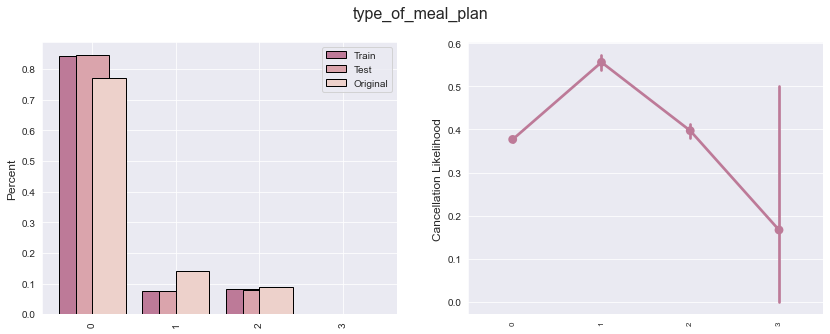

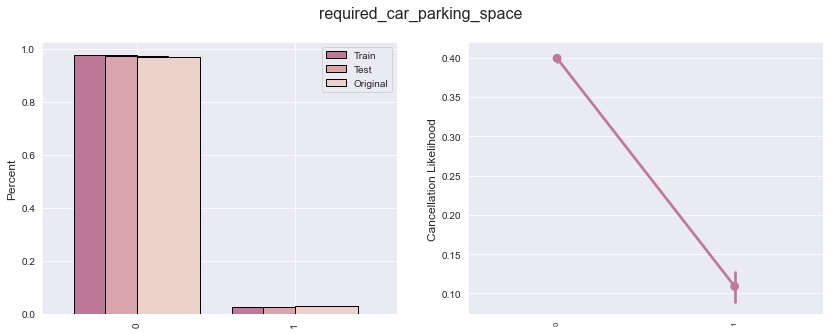

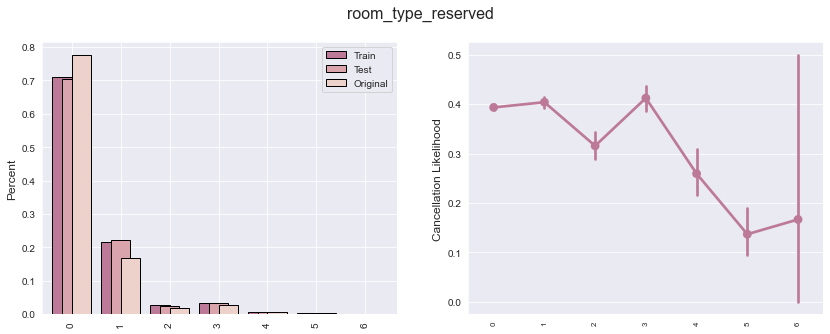

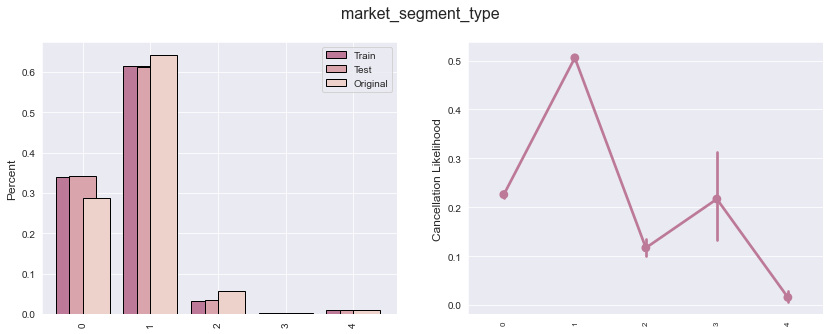

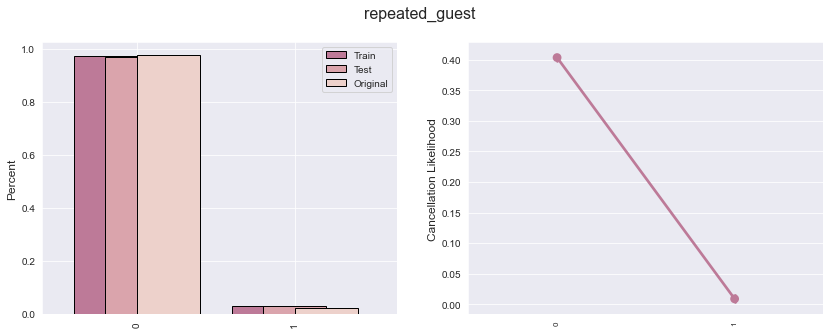

In [15]:
for i in cat_col:

    # xticks
    xticks_train = list(train[i].unique())
    xticks_test = list(test[i].unique())
    xticks_original = list(original[i].unique())
    
    # merge xticks_train, xticks_test, xticks_original
    xticks = list(OrderedDict.fromkeys(xticks_train + xticks_test + xticks_original))
    if all([str(item).isdigit() for item in xticks]): xticks.sort()
    
    # figure, axes
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    # figure title
    fig.suptitle(i, fontsize=16)
    
    # train / test / original differences
    pct_train = train[i].value_counts(normalize=True).reindex(xticks)
    pct_test = test[i].value_counts(normalize=True).reindex(xticks)
    pct_original = original[i].value_counts(normalize=True).reindex(xticks)
    pct_train.plot(kind='bar', align='edge', width=-0.4, ax=ax[0], color=colors[2], edgecolor='black')
    pct_test.plot(kind='bar', align='center', width=0.4, ax=ax[0], color=colors[1], edgecolor='black')
    pct_original.plot(kind='bar', align='edge', width=0.4, ax=ax[0], color=colors[0], edgecolor='black')
    ax[0].set_xlim(-0.6) 
    ax[0].set_ylabel('Percent', fontsize=12)
    ax[0].legend(['Train', 'Test', 'Original'])
    
    # stroke likelihood
    sns.pointplot(data=train, x=i, y='booking_status', color=colors[2], ax=ax[1])
    ax[1].tick_params(axis='x', labelsize=8, rotation=90)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Cancellation Likelihood', fontsize = 12)

The categorical variables provide quite a signal for the likelihood of cancellation.

### 4.3 Distribution of Numerical columns:

Here I plot the distributions of the continuous variables for the Train, Test and Original dataset and also the distribution (using a boxplot) of these continuous variables with respect to people cancelling their reservation or not.

In [16]:
cont_col = [x for x in train.columns if x not in cat_col]

In [17]:
cont_col

['id',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

In [18]:
## Dropping id and booking_status:
cont_col.remove('id')
cont_col.remove('booking_status')

In [19]:
cont_col

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

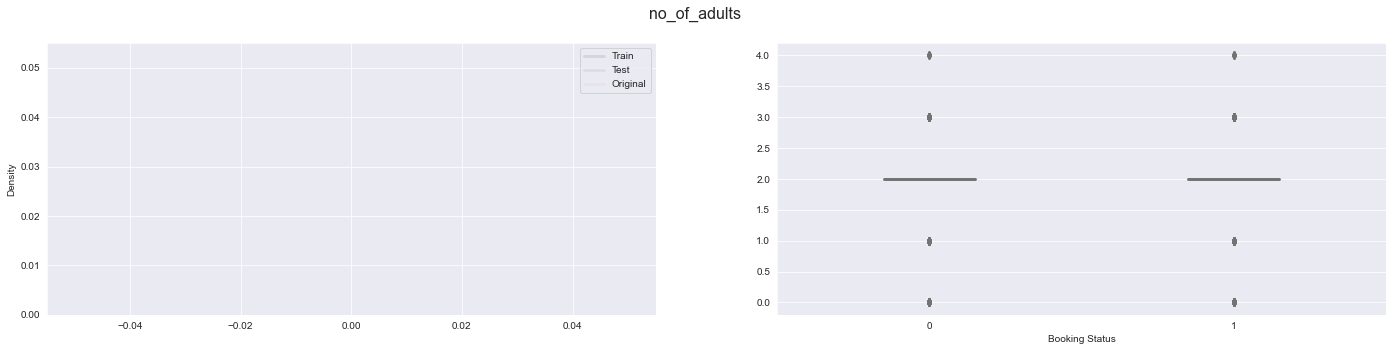

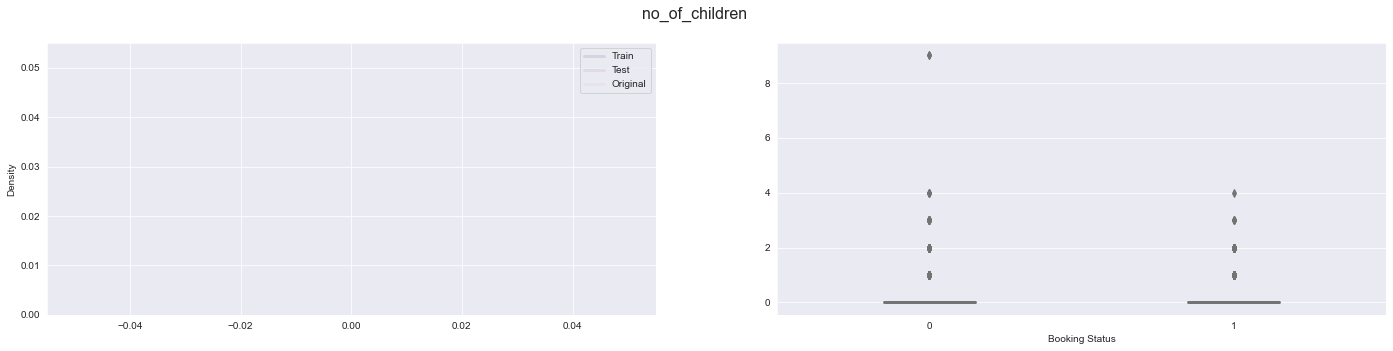

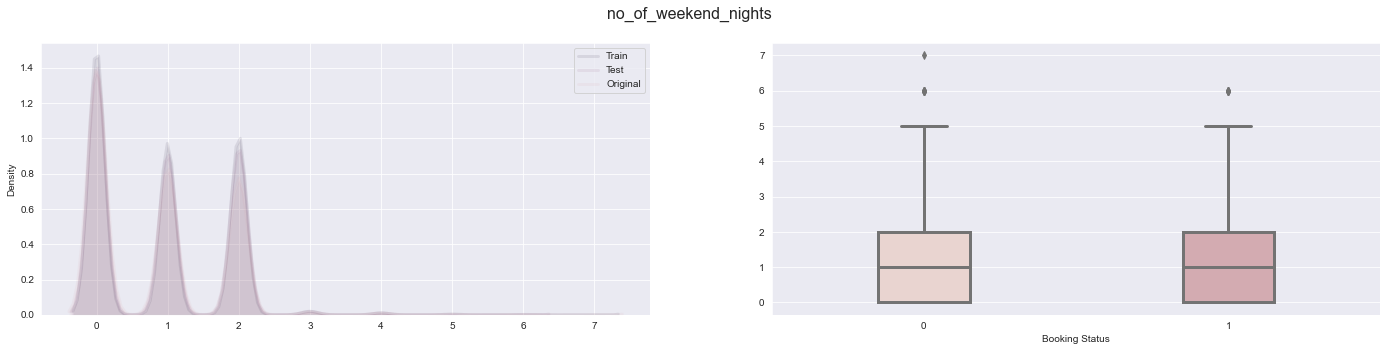

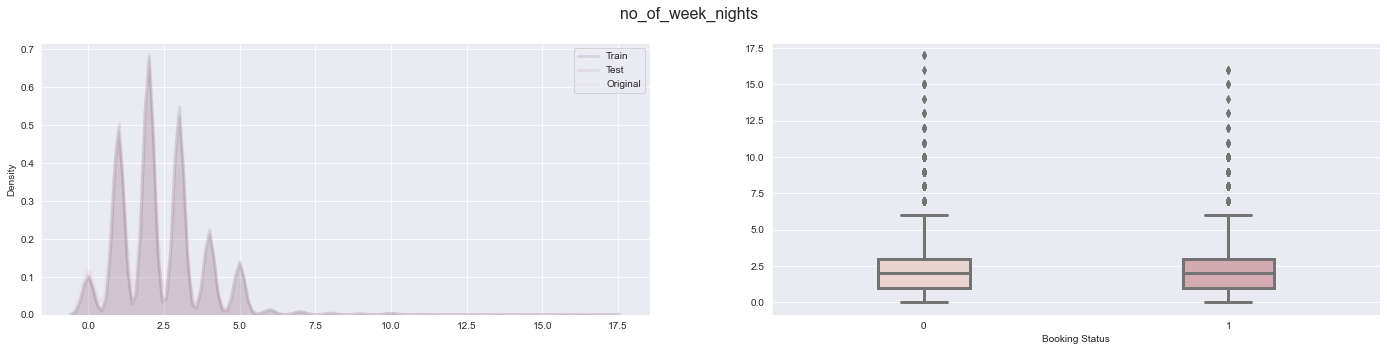

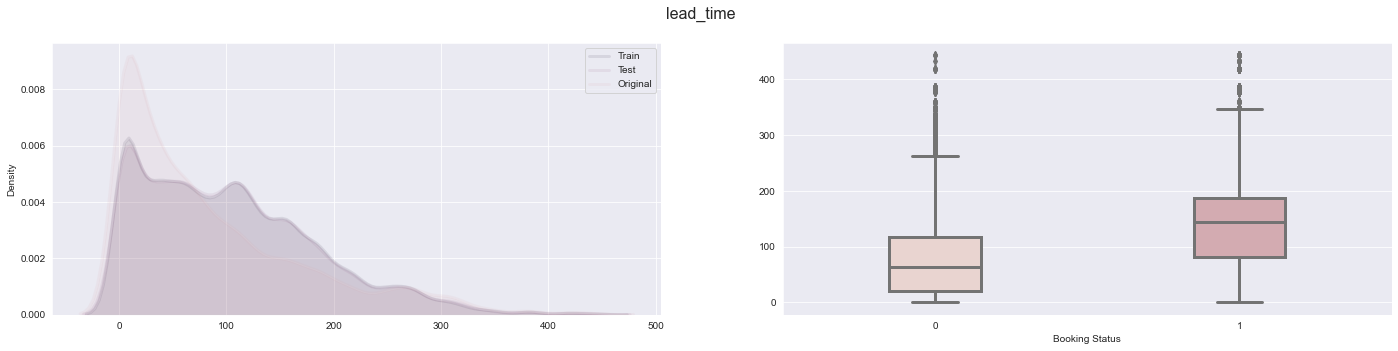

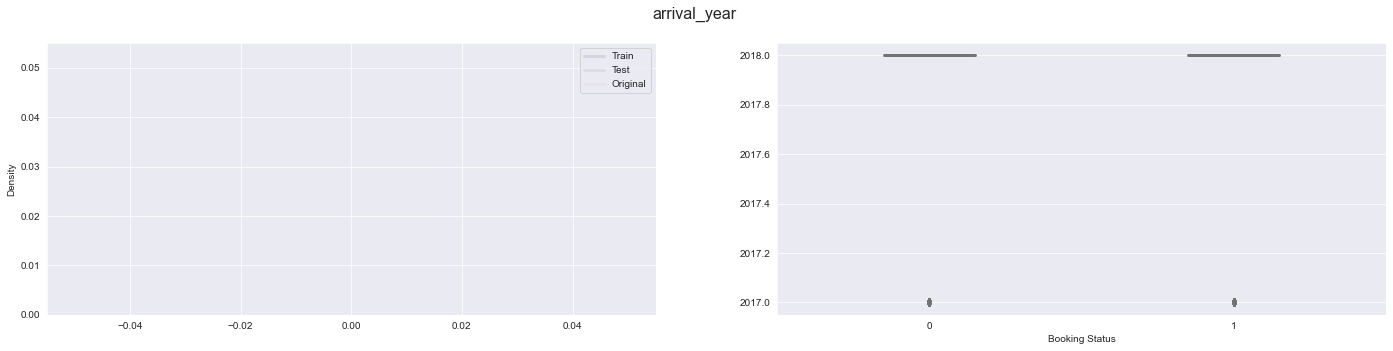

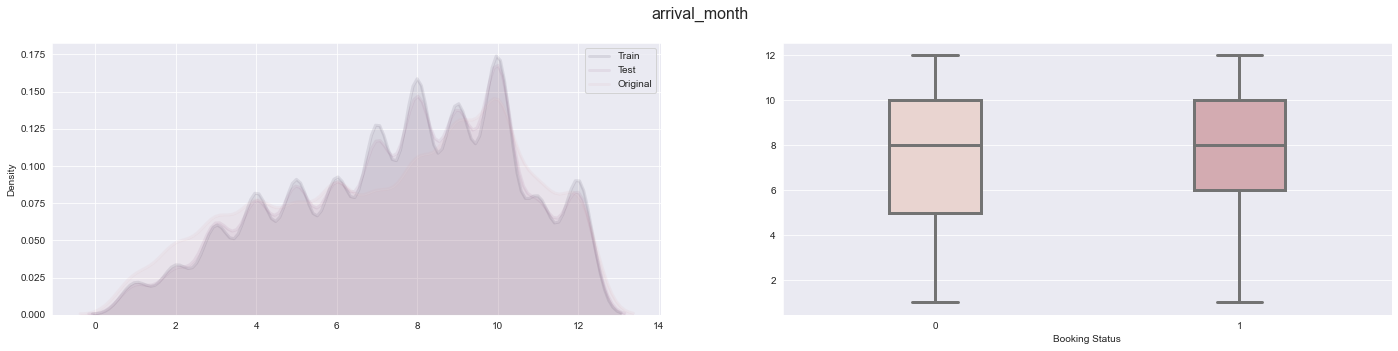

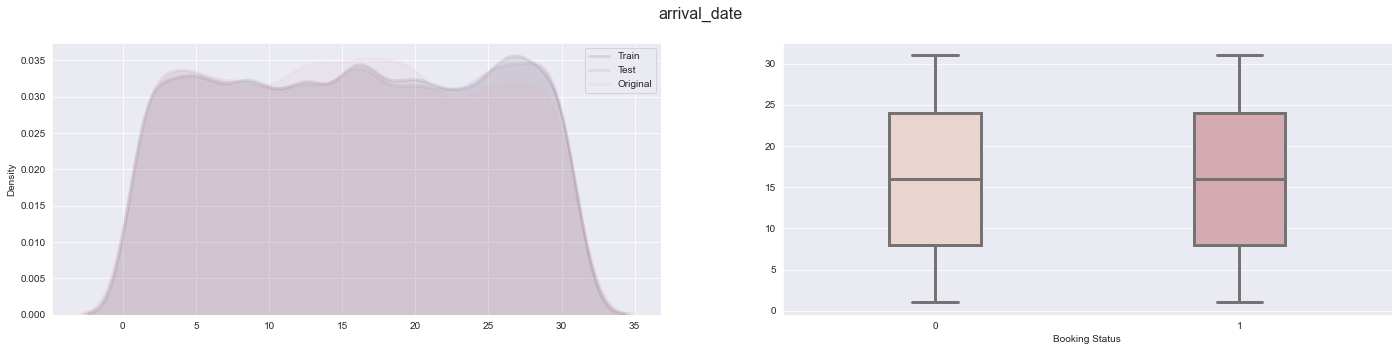

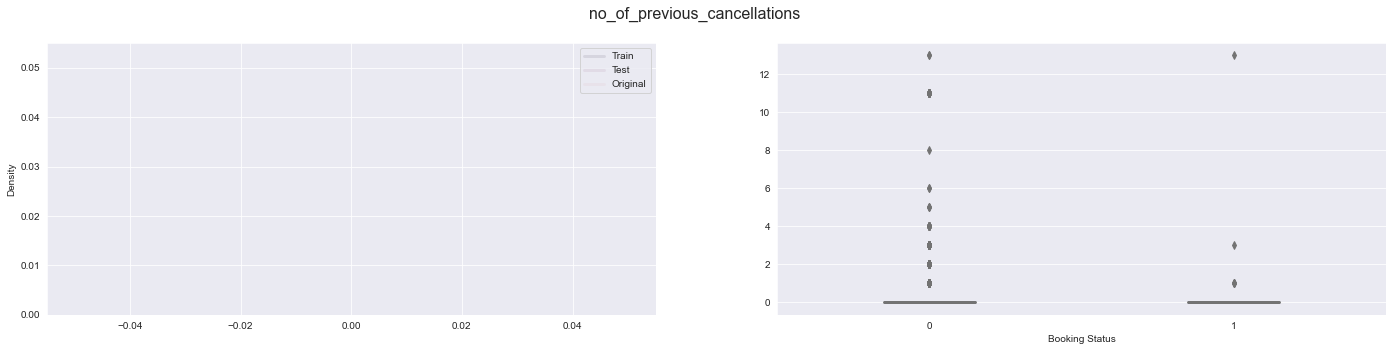

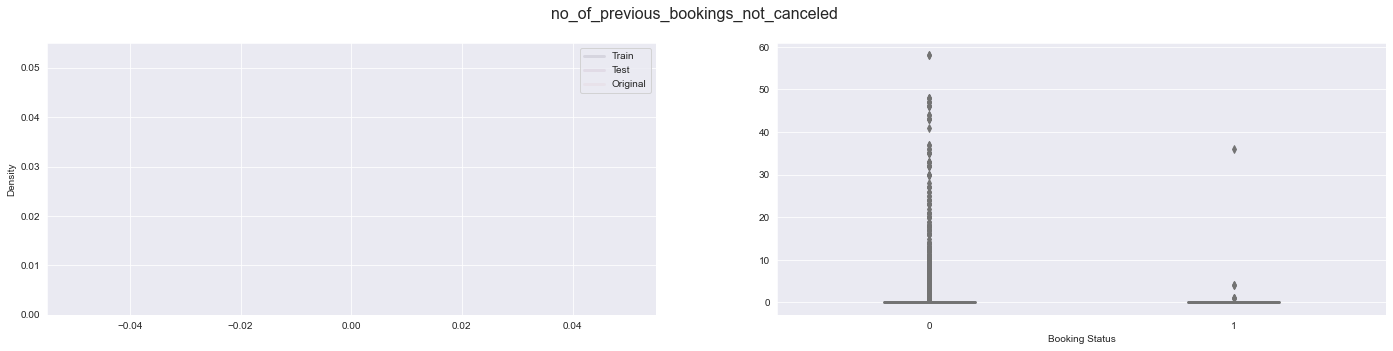

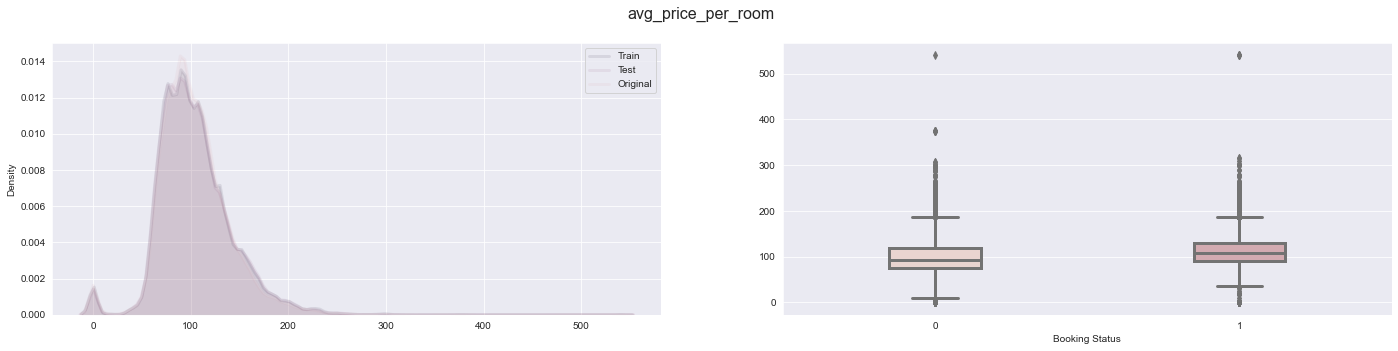

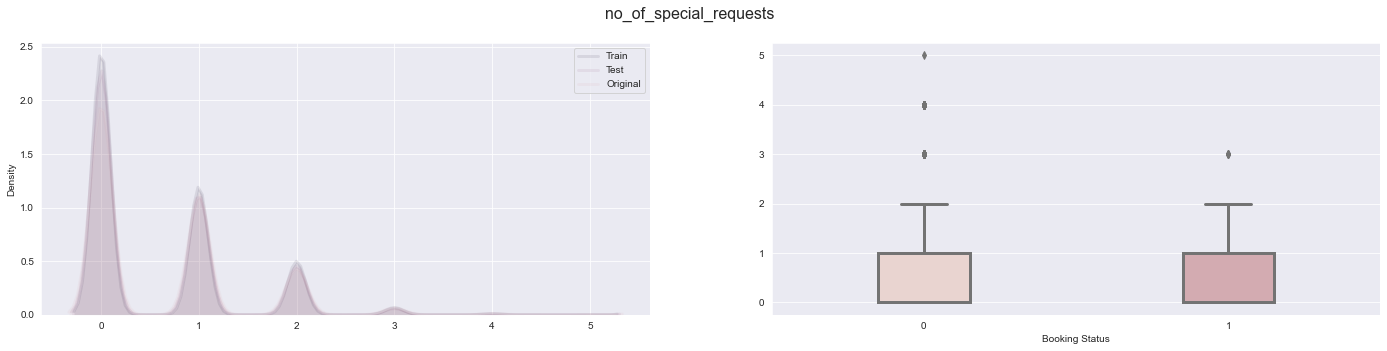

In [20]:
for i in cont_col:
    
    # figure, axes
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(1, 2, figsize=(24,5))
    # figure title
    fig.suptitle(i, fontsize=16)
    
    # train / test / original differences
    sns.kdeplot(train[i], shade=True, color=colors[5], ax=ax[0], label='Train', alpha=0.1, linewidth=3)
    sns.kdeplot(test[i], shade=True, color=colors[3], ax=ax[0], label='Test', alpha=0.1, linewidth=3)
    sns.kdeplot(original[i], shade=True, color=colors[1], ax=ax[0], label='Original', alpha=0.1, linewidth=3)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Density')
    handles, labels = ax[0].get_legend_handles_labels()
    ax[0].legend(handles, labels)
    
   
    # boxplot
    sns.boxplot(y=i, x='booking_status', data=train, width=0.3, ax=ax[1], palette=colors, linewidth=3)
    ax[1].set_xlabel('Booking Status')
    ax[1].set_ylabel('')

### 4.4 Correlations

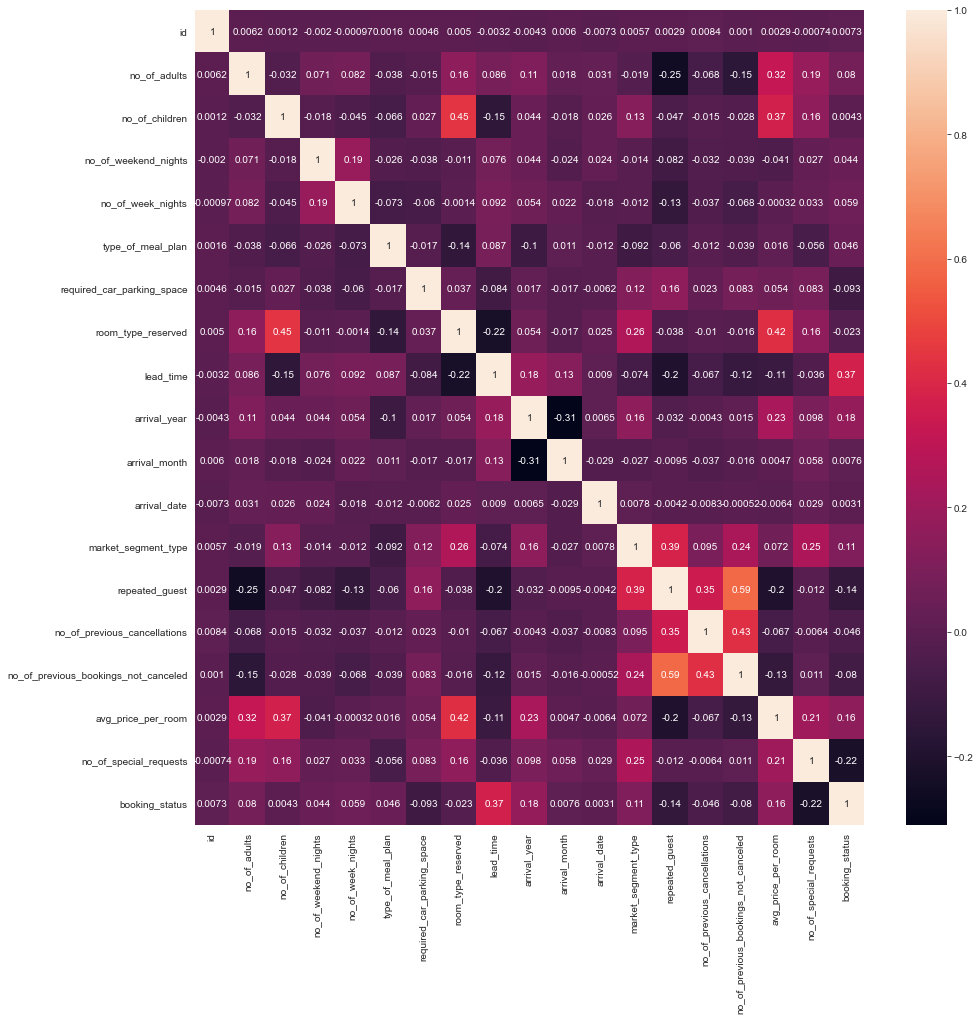

In [21]:
plt.figure(figsize = (15, 15))
sns.heatmap(train.corr(), annot = True)

## 5. Data Preparation:

In order to prepare the data for model fitting, I will go through the following four steps:

1. Adding the original dataset to the train data.
2. Removing the irrelevant `id` column.
3. One- hot encoding the categorical variables.
4. Separating the features and the target columns.



### 5.1 Adding the original dataset to the train data:

This will give us a more elaborate data to train our models on.

In [22]:
train_full = pd.concat([train, original], axis=0, ignore_index=True)
train_full.shape

(60237, 19)

In [23]:
train_full.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1.0,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2.0,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3.0,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4.0,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### 5.2 Removing the irrelevant `id` column:

In [24]:
train_full.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace = True)

In [25]:
train_full.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [26]:
test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


### 5.3 One-hot Encoding Categorical Columns:


In [27]:
cat_col

['type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'market_segment_type',
 'repeated_guest']

Here, `required_car_parking_space` and `repeated_guest` columns are already binary and so I encode the other three columns.

In [28]:
def encode(df):
    meal_dummy = pd.get_dummies(df['type_of_meal_plan'], prefix = 'mealPlan', drop_first = True)
    room_dummy = pd.get_dummies(df['room_type_reserved'], prefix = 'roomType', drop_first = True)
    market_dummy = pd.get_dummies(df['market_segment_type'], prefix = 'marketSegment', drop_first=True)
    
    df = pd.concat([df, meal_dummy, room_dummy, market_dummy], axis=1)
    return df

In [29]:
## Encoding in train data:
train_full = encode(train_full)

## Encoding in test data:
test = encode(test)

In [30]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60237 entries, 0 to 60236
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          60237 non-null  int64  
 1   no_of_children                        60237 non-null  int64  
 2   no_of_weekend_nights                  60237 non-null  int64  
 3   no_of_week_nights                     60237 non-null  int64  
 4   type_of_meal_plan                     60237 non-null  int64  
 5   required_car_parking_space            60237 non-null  int64  
 6   room_type_reserved                    60237 non-null  int64  
 7   lead_time                             60237 non-null  int64  
 8   arrival_year                          60237 non-null  int64  
 9   arrival_month                         60237 non-null  int64  
 10  arrival_date                          60237 non-null  int64  
 11  market_segment_

In [31]:
train_full.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis = 1, inplace=True)
test.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis = 1, inplace=True)

### 5.4 Separating features and target columns:

In [32]:
X = train_full.drop(['booking_status'], axis=1).copy()
y = train_full['booking_status'].copy()
X_test = test.copy()

## 6. Modelling:

Now I move into training models on the training data. I have trained primarily four models:
1. Random Forest Classifier
2. XGBoost Classifier
3. LightGBM Classifier
4. Catboost Classifier

I will be using a 5-fold Stratified Cross-Validation in each model training.

### 6.1 Random Forest Classifier:

fold : 1
score : 0.9005991362048565
----------------------------------------
fold : 2
score : 0.8918043153731412
----------------------------------------
fold : 3
score : 0.9006556764466915
----------------------------------------
fold : 4
score : 0.9031981738194996
----------------------------------------
fold : 5
score : 0.8986119873984396
----------------------------------------
Score over 5-folds: 0.8989738578485257


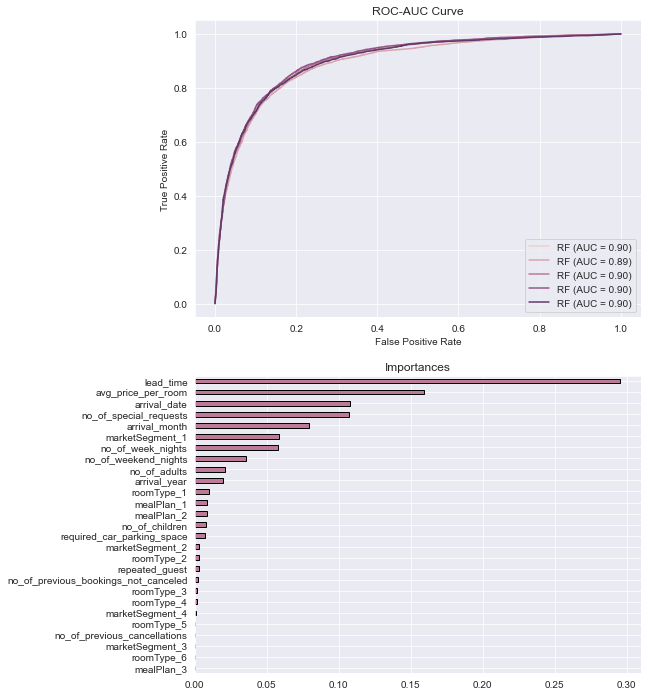

In [33]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 1, figsize=(8,12))
ax[0].set_title('ROC-AUC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate');
ax[1].set_title('Importances')

rf_cv_scores = []
rf_importances = []


skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, y)):
    
    ## Split into train and validation set:
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    ## Model:
    rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
    rf.fit(X_train, y_train)
    
    ## Importances:
    rf_importances.append(rf.feature_importances_)
    
    ## Prediction and Evaluation:
    rf_pred = rf.predict_proba(X_valid)[:, 1]
    rf_cv_scores.append(roc_auc_score(y_valid, rf_pred))
    fpr, tpr, thresholds = roc_curve(y_valid, rf_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'RF')
    display.plot(color = colors[fold], ax = ax[0])
    
    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {rf_cv_scores[-1]}')
    print('----------------------------------------')
    
## Importances:
df_importances = pd.DataFrame(rf_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, ax=ax[1], color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(rf_cv_scores)}')

### 6.2 XGBoost Classifier:

fold : 1
score : 0.9042637953379653
----------------------------------------
fold : 2
score : 0.9025244272798155
----------------------------------------
fold : 3
score : 0.9030428000444
----------------------------------------
fold : 4
score : 0.9048891144393361
----------------------------------------
fold : 5
score : 0.9021749145289498
----------------------------------------
Score over 5-folds: 0.9033790103260934


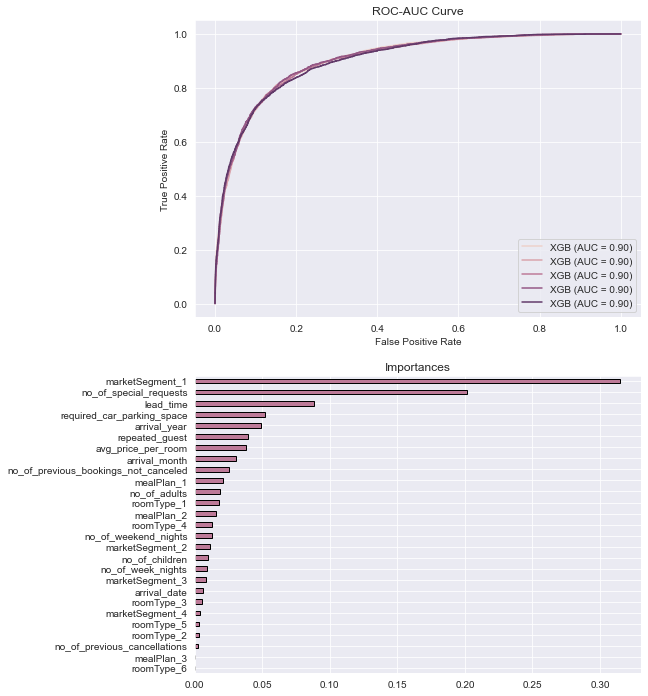

In [34]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 1, figsize=(8,12))
ax[0].set_title('ROC-AUC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate');
ax[1].set_title('Importances')

xgb_cv_scores = []
xgb_importances = []


skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, y)):
    
    ## Split into train and validation set:
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    
    ## Model:
    
    xgb_model = XGBClassifier(max_depth = 7,
                              learning_rate = 0.01,
                              n_estimators = 500,
                              subsample = 0.7,
                              colsample_bytree = 0.7,
                              reg_alpha = 3,
                              reg_lambda = 3)
    xgb_model.fit(X_train, y_train)
        
    ## Importances:
    xgb_importances.append(xgb_model.feature_importances_)
    
    ## Prediction and Evaluation:
    xgb_pred = xgb_model.predict_proba(X_valid)[:, 1]
    xgb_cv_scores.append(roc_auc_score(y_valid, xgb_pred))
    fpr, tpr, thresholds = roc_curve(y_valid, xgb_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'XGB')
    display.plot(color = colors[fold], ax = ax[0])
    
    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {xgb_cv_scores[-1]}')
    print('----------------------------------------')
    
## Importances:
df_importances = pd.DataFrame(xgb_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, ax=ax[1], color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(xgb_cv_scores)}')

### 6.3 LightGBM Classifier:

fold : 1
score : 0.9010745379829413
----------------------------------------
fold : 2
score : 0.899314521523529
----------------------------------------
fold : 3
score : 0.8993395605063472
----------------------------------------
fold : 4
score : 0.9016764156845487
----------------------------------------
fold : 5
score : 0.8991194316930434
----------------------------------------
Score over 5-folds: 0.9001048934780819


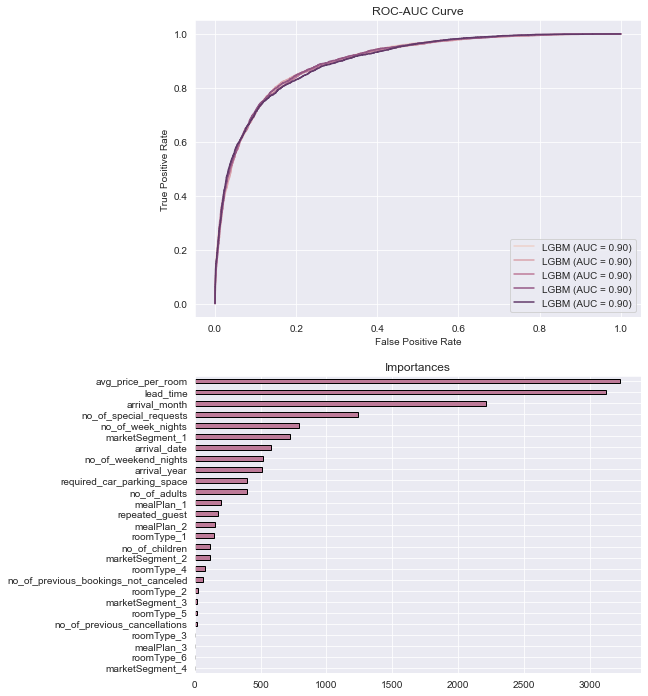

In [35]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 1, figsize=(8,12))
ax[0].set_title('ROC-AUC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate');
ax[1].set_title('Importances')

lgb_cv_scores = []
lgb_importances = []


skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, y)):
    
    ## Split into train and validation set:
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    
    ## Model:
    
    lgb_model = LGBMClassifier(max_depth = 7,
                              learning_rate = 0.01,
                              n_estimators = 500,
                              subsample = 0.7,
                              colsample_bytree = 0.7,
                              reg_alpha = 3,
                              reg_lambda = 3)
    lgb_model.fit(X_train, y_train)
        
    ## Importances:
    lgb_importances.append(lgb_model.feature_importances_)
    
    ## Prediction and Evaluation:
    lgb_pred = lgb_model.predict_proba(X_valid)[:, 1]
    lgb_cv_scores.append(roc_auc_score(y_valid, lgb_pred))
    fpr, tpr, thresholds = roc_curve(y_valid, lgb_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'LGBM')
    display.plot(color = colors[fold], ax = ax[0])
    
    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {lgb_cv_scores[-1]}')
    print('----------------------------------------')
    
## Importances:
df_importances = pd.DataFrame(lgb_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, ax=ax[1], color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(lgb_cv_scores)}')

### 6.4 Catboost Classifier:

0:	learn: 0.6871782	total: 187ms	remaining: 1m 33s
1:	learn: 0.6809190	total: 211ms	remaining: 52.6s
2:	learn: 0.6751181	total: 235ms	remaining: 38.9s
3:	learn: 0.6692162	total: 257ms	remaining: 31.9s
4:	learn: 0.6637756	total: 280ms	remaining: 27.7s
5:	learn: 0.6583760	total: 302ms	remaining: 24.8s
6:	learn: 0.6530311	total: 324ms	remaining: 22.8s
7:	learn: 0.6477055	total: 347ms	remaining: 21.3s
8:	learn: 0.6426465	total: 368ms	remaining: 20.1s
9:	learn: 0.6377897	total: 392ms	remaining: 19.2s
10:	learn: 0.6330540	total: 413ms	remaining: 18.4s
11:	learn: 0.6280294	total: 436ms	remaining: 17.7s
12:	learn: 0.6233487	total: 459ms	remaining: 17.2s
13:	learn: 0.6187114	total: 482ms	remaining: 16.7s
14:	learn: 0.6143419	total: 501ms	remaining: 16.2s
15:	learn: 0.6101978	total: 521ms	remaining: 15.8s
16:	learn: 0.6061349	total: 543ms	remaining: 15.4s
17:	learn: 0.6022598	total: 565ms	remaining: 15.1s
18:	learn: 0.5981606	total: 588ms	remaining: 14.9s
19:	learn: 0.5942530	total: 611ms	remain

165:	learn: 0.4285347	total: 3.8s	remaining: 7.65s
166:	learn: 0.4282481	total: 3.82s	remaining: 7.61s
167:	learn: 0.4279724	total: 3.84s	remaining: 7.58s
168:	learn: 0.4277494	total: 3.86s	remaining: 7.56s
169:	learn: 0.4275293	total: 3.88s	remaining: 7.54s
170:	learn: 0.4273180	total: 3.91s	remaining: 7.52s
171:	learn: 0.4270643	total: 3.93s	remaining: 7.49s
172:	learn: 0.4267951	total: 3.95s	remaining: 7.46s
173:	learn: 0.4265500	total: 3.97s	remaining: 7.43s
174:	learn: 0.4263439	total: 3.98s	remaining: 7.4s
175:	learn: 0.4261148	total: 4s	remaining: 7.37s
176:	learn: 0.4258402	total: 4.02s	remaining: 7.34s
177:	learn: 0.4256374	total: 4.04s	remaining: 7.31s
178:	learn: 0.4254200	total: 4.06s	remaining: 7.28s
179:	learn: 0.4251992	total: 4.08s	remaining: 7.25s
180:	learn: 0.4249810	total: 4.09s	remaining: 7.22s
181:	learn: 0.4247337	total: 4.11s	remaining: 7.18s
182:	learn: 0.4245310	total: 4.13s	remaining: 7.15s
183:	learn: 0.4242804	total: 4.15s	remaining: 7.12s
184:	learn: 0.424

324:	learn: 0.4058768	total: 8.13s	remaining: 4.38s
325:	learn: 0.4057818	total: 8.21s	remaining: 4.38s
326:	learn: 0.4056710	total: 8.32s	remaining: 4.4s
327:	learn: 0.4055847	total: 8.38s	remaining: 4.39s
328:	learn: 0.4055037	total: 8.43s	remaining: 4.38s
329:	learn: 0.4054414	total: 8.48s	remaining: 4.37s
330:	learn: 0.4053444	total: 8.53s	remaining: 4.35s
331:	learn: 0.4052573	total: 8.61s	remaining: 4.36s
332:	learn: 0.4051888	total: 8.68s	remaining: 4.36s
333:	learn: 0.4050904	total: 8.74s	remaining: 4.34s
334:	learn: 0.4049988	total: 8.82s	remaining: 4.34s
335:	learn: 0.4048843	total: 8.87s	remaining: 4.33s
336:	learn: 0.4047913	total: 8.91s	remaining: 4.31s
337:	learn: 0.4047070	total: 8.96s	remaining: 4.29s
338:	learn: 0.4046330	total: 9.02s	remaining: 4.28s
339:	learn: 0.4045288	total: 9.09s	remaining: 4.28s
340:	learn: 0.4044628	total: 9.15s	remaining: 4.26s
341:	learn: 0.4043719	total: 9.23s	remaining: 4.27s
342:	learn: 0.4043027	total: 9.28s	remaining: 4.25s
343:	learn: 0

487:	learn: 0.3952397	total: 13.9s	remaining: 342ms
488:	learn: 0.3951932	total: 13.9s	remaining: 313ms
489:	learn: 0.3951407	total: 13.9s	remaining: 285ms
490:	learn: 0.3950745	total: 14s	remaining: 256ms
491:	learn: 0.3950429	total: 14s	remaining: 228ms
492:	learn: 0.3949770	total: 14s	remaining: 199ms
493:	learn: 0.3949162	total: 14s	remaining: 171ms
494:	learn: 0.3948640	total: 14.1s	remaining: 142ms
495:	learn: 0.3948063	total: 14.1s	remaining: 114ms
496:	learn: 0.3947545	total: 14.1s	remaining: 85.2ms
497:	learn: 0.3947033	total: 14.1s	remaining: 56.8ms
498:	learn: 0.3946527	total: 14.2s	remaining: 28.4ms
499:	learn: 0.3946080	total: 14.2s	remaining: 0us
fold : 1
score : 0.8935711675268243
----------------------------------------
0:	learn: 0.6871259	total: 24ms	remaining: 12s
1:	learn: 0.6807675	total: 47.2ms	remaining: 11.8s
2:	learn: 0.6748897	total: 71.5ms	remaining: 11.8s
3:	learn: 0.6687791	total: 95.8ms	remaining: 11.9s
4:	learn: 0.6633585	total: 122ms	remaining: 12.1s
5:	l

147:	learn: 0.4317384	total: 4.52s	remaining: 10.8s
148:	learn: 0.4314041	total: 4.55s	remaining: 10.7s
149:	learn: 0.4311083	total: 4.57s	remaining: 10.7s
150:	learn: 0.4308070	total: 4.59s	remaining: 10.6s
151:	learn: 0.4305209	total: 4.62s	remaining: 10.6s
152:	learn: 0.4301918	total: 4.64s	remaining: 10.5s
153:	learn: 0.4298685	total: 4.66s	remaining: 10.5s
154:	learn: 0.4296022	total: 4.69s	remaining: 10.4s
155:	learn: 0.4292785	total: 4.72s	remaining: 10.4s
156:	learn: 0.4290520	total: 4.75s	remaining: 10.4s
157:	learn: 0.4287445	total: 4.8s	remaining: 10.4s
158:	learn: 0.4284759	total: 4.84s	remaining: 10.4s
159:	learn: 0.4281639	total: 4.88s	remaining: 10.4s
160:	learn: 0.4278556	total: 4.93s	remaining: 10.4s
161:	learn: 0.4275944	total: 5.01s	remaining: 10.5s
162:	learn: 0.4273711	total: 5.07s	remaining: 10.5s
163:	learn: 0.4271312	total: 5.11s	remaining: 10.5s
164:	learn: 0.4268662	total: 5.16s	remaining: 10.5s
165:	learn: 0.4266311	total: 5.2s	remaining: 10.5s
166:	learn: 0.

313:	learn: 0.4052604	total: 8.6s	remaining: 5.09s
314:	learn: 0.4051684	total: 8.62s	remaining: 5.06s
315:	learn: 0.4050789	total: 8.64s	remaining: 5.03s
316:	learn: 0.4049924	total: 8.66s	remaining: 5s
317:	learn: 0.4049332	total: 8.68s	remaining: 4.97s
318:	learn: 0.4048507	total: 8.7s	remaining: 4.94s
319:	learn: 0.4047371	total: 8.73s	remaining: 4.91s
320:	learn: 0.4046435	total: 8.75s	remaining: 4.88s
321:	learn: 0.4045760	total: 8.77s	remaining: 4.85s
322:	learn: 0.4044855	total: 8.79s	remaining: 4.82s
323:	learn: 0.4044072	total: 8.81s	remaining: 4.79s
324:	learn: 0.4043123	total: 8.84s	remaining: 4.76s
325:	learn: 0.4042210	total: 8.86s	remaining: 4.73s
326:	learn: 0.4041521	total: 8.89s	remaining: 4.7s
327:	learn: 0.4040718	total: 8.91s	remaining: 4.67s
328:	learn: 0.4039942	total: 8.93s	remaining: 4.64s
329:	learn: 0.4039117	total: 8.95s	remaining: 4.61s
330:	learn: 0.4038256	total: 8.98s	remaining: 4.58s
331:	learn: 0.4037355	total: 9s	remaining: 4.55s
332:	learn: 0.4036602

475:	learn: 0.3942933	total: 12.1s	remaining: 612ms
476:	learn: 0.3942561	total: 12.2s	remaining: 587ms
477:	learn: 0.3942146	total: 12.2s	remaining: 561ms
478:	learn: 0.3941531	total: 12.2s	remaining: 535ms
479:	learn: 0.3940803	total: 12.2s	remaining: 510ms
480:	learn: 0.3940104	total: 12.3s	remaining: 484ms
481:	learn: 0.3939434	total: 12.3s	remaining: 458ms
482:	learn: 0.3939230	total: 12.3s	remaining: 433ms
483:	learn: 0.3938540	total: 12.3s	remaining: 407ms
484:	learn: 0.3937840	total: 12.3s	remaining: 382ms
485:	learn: 0.3937358	total: 12.4s	remaining: 356ms
486:	learn: 0.3936907	total: 12.4s	remaining: 330ms
487:	learn: 0.3936318	total: 12.4s	remaining: 305ms
488:	learn: 0.3935750	total: 12.4s	remaining: 279ms
489:	learn: 0.3935281	total: 12.4s	remaining: 254ms
490:	learn: 0.3934949	total: 12.5s	remaining: 228ms
491:	learn: 0.3934454	total: 12.5s	remaining: 203ms
492:	learn: 0.3933973	total: 12.5s	remaining: 178ms
493:	learn: 0.3933170	total: 12.5s	remaining: 152ms
494:	learn: 

134:	learn: 0.4376887	total: 4.79s	remaining: 13s
135:	learn: 0.4373138	total: 4.86s	remaining: 13s
136:	learn: 0.4369509	total: 4.96s	remaining: 13.1s
137:	learn: 0.4365569	total: 5.01s	remaining: 13.1s
138:	learn: 0.4361811	total: 5.06s	remaining: 13.1s
139:	learn: 0.4358155	total: 5.1s	remaining: 13.1s
140:	learn: 0.4354599	total: 5.14s	remaining: 13.1s
141:	learn: 0.4351358	total: 5.18s	remaining: 13.1s
142:	learn: 0.4348197	total: 5.22s	remaining: 13s
143:	learn: 0.4344496	total: 5.26s	remaining: 13s
144:	learn: 0.4341431	total: 5.3s	remaining: 13s
145:	learn: 0.4337654	total: 5.33s	remaining: 12.9s
146:	learn: 0.4334722	total: 5.37s	remaining: 12.9s
147:	learn: 0.4331047	total: 5.39s	remaining: 12.8s
148:	learn: 0.4327923	total: 5.42s	remaining: 12.8s
149:	learn: 0.4325169	total: 5.44s	remaining: 12.7s
150:	learn: 0.4321973	total: 5.47s	remaining: 12.6s
151:	learn: 0.4319078	total: 5.49s	remaining: 12.6s
152:	learn: 0.4316093	total: 5.53s	remaining: 12.5s
153:	learn: 0.4313345	to

295:	learn: 0.4080025	total: 8.76s	remaining: 6.04s
296:	learn: 0.4078873	total: 8.79s	remaining: 6.01s
297:	learn: 0.4077983	total: 8.81s	remaining: 5.97s
298:	learn: 0.4077218	total: 8.83s	remaining: 5.94s
299:	learn: 0.4076083	total: 8.87s	remaining: 5.91s
300:	learn: 0.4075034	total: 8.89s	remaining: 5.88s
301:	learn: 0.4074062	total: 8.91s	remaining: 5.84s
302:	learn: 0.4073093	total: 8.93s	remaining: 5.81s
303:	learn: 0.4072069	total: 8.96s	remaining: 5.78s
304:	learn: 0.4071133	total: 8.98s	remaining: 5.74s
305:	learn: 0.4070120	total: 9s	remaining: 5.71s
306:	learn: 0.4069170	total: 9.02s	remaining: 5.67s
307:	learn: 0.4068178	total: 9.04s	remaining: 5.64s
308:	learn: 0.4067266	total: 9.07s	remaining: 5.6s
309:	learn: 0.4066526	total: 9.09s	remaining: 5.57s
310:	learn: 0.4065572	total: 9.11s	remaining: 5.53s
311:	learn: 0.4064645	total: 9.13s	remaining: 5.5s
312:	learn: 0.4063834	total: 9.15s	remaining: 5.46s
313:	learn: 0.4062515	total: 9.17s	remaining: 5.43s
314:	learn: 0.406

460:	learn: 0.3957867	total: 12.3s	remaining: 1.04s
461:	learn: 0.3957326	total: 12.3s	remaining: 1.01s
462:	learn: 0.3956575	total: 12.3s	remaining: 984ms
463:	learn: 0.3955853	total: 12.3s	remaining: 957ms
464:	learn: 0.3955324	total: 12.4s	remaining: 930ms
465:	learn: 0.3954887	total: 12.4s	remaining: 903ms
466:	learn: 0.3954398	total: 12.4s	remaining: 876ms
467:	learn: 0.3953937	total: 12.4s	remaining: 849ms
468:	learn: 0.3953222	total: 12.4s	remaining: 822ms
469:	learn: 0.3952454	total: 12.5s	remaining: 795ms
470:	learn: 0.3951701	total: 12.5s	remaining: 768ms
471:	learn: 0.3951112	total: 12.5s	remaining: 741ms
472:	learn: 0.3950642	total: 12.5s	remaining: 714ms
473:	learn: 0.3950183	total: 12.5s	remaining: 688ms
474:	learn: 0.3949756	total: 12.6s	remaining: 661ms
475:	learn: 0.3949265	total: 12.6s	remaining: 634ms
476:	learn: 0.3948566	total: 12.6s	remaining: 607ms
477:	learn: 0.3948180	total: 12.6s	remaining: 581ms
478:	learn: 0.3947876	total: 12.6s	remaining: 554ms
479:	learn: 

124:	learn: 0.4424587	total: 3.32s	remaining: 9.95s
125:	learn: 0.4420138	total: 3.37s	remaining: 10s
126:	learn: 0.4416057	total: 3.41s	remaining: 10s
127:	learn: 0.4411944	total: 3.45s	remaining: 10s
128:	learn: 0.4407450	total: 3.52s	remaining: 10.1s
129:	learn: 0.4402719	total: 3.56s	remaining: 10.1s
130:	learn: 0.4398440	total: 3.59s	remaining: 10.1s
131:	learn: 0.4393838	total: 3.64s	remaining: 10.1s
132:	learn: 0.4389667	total: 3.67s	remaining: 10.1s
133:	learn: 0.4385590	total: 3.72s	remaining: 10.2s
134:	learn: 0.4382015	total: 3.76s	remaining: 10.2s
135:	learn: 0.4377230	total: 3.79s	remaining: 10.1s
136:	learn: 0.4373569	total: 3.82s	remaining: 10.1s
137:	learn: 0.4369953	total: 3.85s	remaining: 10.1s
138:	learn: 0.4366502	total: 3.88s	remaining: 10.1s
139:	learn: 0.4363022	total: 3.91s	remaining: 10.1s
140:	learn: 0.4360089	total: 3.94s	remaining: 10s
141:	learn: 0.4356766	total: 3.97s	remaining: 10s
142:	learn: 0.4353046	total: 3.99s	remaining: 9.97s
143:	learn: 0.4349182	

288:	learn: 0.4092419	total: 7.32s	remaining: 5.35s
289:	learn: 0.4091292	total: 7.34s	remaining: 5.32s
290:	learn: 0.4090043	total: 7.36s	remaining: 5.29s
291:	learn: 0.4089139	total: 7.39s	remaining: 5.26s
292:	learn: 0.4088049	total: 7.41s	remaining: 5.23s
293:	learn: 0.4087085	total: 7.42s	remaining: 5.2s
294:	learn: 0.4086245	total: 7.45s	remaining: 5.17s
295:	learn: 0.4085237	total: 7.47s	remaining: 5.15s
296:	learn: 0.4084275	total: 7.49s	remaining: 5.12s
297:	learn: 0.4082813	total: 7.51s	remaining: 5.09s
298:	learn: 0.4081807	total: 7.53s	remaining: 5.06s
299:	learn: 0.4080729	total: 7.55s	remaining: 5.03s
300:	learn: 0.4079833	total: 7.57s	remaining: 5s
301:	learn: 0.4078920	total: 7.59s	remaining: 4.97s
302:	learn: 0.4077801	total: 7.61s	remaining: 4.95s
303:	learn: 0.4076887	total: 7.63s	remaining: 4.92s
304:	learn: 0.4075988	total: 7.65s	remaining: 4.89s
305:	learn: 0.4075066	total: 7.67s	remaining: 4.86s
306:	learn: 0.4074138	total: 7.68s	remaining: 4.83s
307:	learn: 0.40

449:	learn: 0.3972296	total: 10.9s	remaining: 1.21s
450:	learn: 0.3971840	total: 10.9s	remaining: 1.19s
451:	learn: 0.3970996	total: 10.9s	remaining: 1.16s
452:	learn: 0.3970488	total: 10.9s	remaining: 1.14s
453:	learn: 0.3969841	total: 11s	remaining: 1.11s
454:	learn: 0.3969169	total: 11s	remaining: 1.09s
455:	learn: 0.3968876	total: 11s	remaining: 1.06s
456:	learn: 0.3968213	total: 11s	remaining: 1.04s
457:	learn: 0.3967610	total: 11s	remaining: 1.01s
458:	learn: 0.3967119	total: 11.1s	remaining: 989ms
459:	learn: 0.3966639	total: 11.1s	remaining: 965ms
460:	learn: 0.3966077	total: 11.1s	remaining: 940ms
461:	learn: 0.3965498	total: 11.1s	remaining: 916ms
462:	learn: 0.3964958	total: 11.1s	remaining: 891ms
463:	learn: 0.3964338	total: 11.2s	remaining: 867ms
464:	learn: 0.3964158	total: 11.2s	remaining: 842ms
465:	learn: 0.3963577	total: 11.2s	remaining: 818ms
466:	learn: 0.3963083	total: 11.2s	remaining: 793ms
467:	learn: 0.3962494	total: 11.2s	remaining: 769ms
468:	learn: 0.3961980	

111:	learn: 0.4484171	total: 3.23s	remaining: 11.2s
112:	learn: 0.4479162	total: 3.26s	remaining: 11.2s
113:	learn: 0.4473352	total: 3.3s	remaining: 11.2s
114:	learn: 0.4468580	total: 3.34s	remaining: 11.2s
115:	learn: 0.4463331	total: 3.38s	remaining: 11.2s
116:	learn: 0.4457890	total: 3.42s	remaining: 11.2s
117:	learn: 0.4453532	total: 3.45s	remaining: 11.2s
118:	learn: 0.4448548	total: 3.48s	remaining: 11.2s
119:	learn: 0.4443387	total: 3.51s	remaining: 11.1s
120:	learn: 0.4438887	total: 3.53s	remaining: 11.1s
121:	learn: 0.4434223	total: 3.56s	remaining: 11s
122:	learn: 0.4429651	total: 3.58s	remaining: 11s
123:	learn: 0.4425288	total: 3.6s	remaining: 10.9s
124:	learn: 0.4420381	total: 3.63s	remaining: 10.9s
125:	learn: 0.4415767	total: 3.65s	remaining: 10.8s
126:	learn: 0.4411918	total: 3.67s	remaining: 10.8s
127:	learn: 0.4407710	total: 3.69s	remaining: 10.7s
128:	learn: 0.4403366	total: 3.72s	remaining: 10.7s
129:	learn: 0.4398943	total: 3.74s	remaining: 10.7s
130:	learn: 0.4394

277:	learn: 0.4100000	total: 7.19s	remaining: 5.74s
278:	learn: 0.4098907	total: 7.21s	remaining: 5.71s
279:	learn: 0.4097996	total: 7.23s	remaining: 5.68s
280:	learn: 0.4096739	total: 7.25s	remaining: 5.65s
281:	learn: 0.4095790	total: 7.27s	remaining: 5.62s
282:	learn: 0.4094889	total: 7.29s	remaining: 5.59s
283:	learn: 0.4093625	total: 7.31s	remaining: 5.56s
284:	learn: 0.4092636	total: 7.33s	remaining: 5.53s
285:	learn: 0.4091690	total: 7.34s	remaining: 5.5s
286:	learn: 0.4090908	total: 7.36s	remaining: 5.46s
287:	learn: 0.4090227	total: 7.38s	remaining: 5.43s
288:	learn: 0.4089285	total: 7.4s	remaining: 5.4s
289:	learn: 0.4088300	total: 7.42s	remaining: 5.38s
290:	learn: 0.4087080	total: 7.44s	remaining: 5.34s
291:	learn: 0.4085505	total: 7.47s	remaining: 5.32s
292:	learn: 0.4084255	total: 7.48s	remaining: 5.29s
293:	learn: 0.4083173	total: 7.5s	remaining: 5.25s
294:	learn: 0.4082105	total: 7.51s	remaining: 5.22s
295:	learn: 0.4081207	total: 7.54s	remaining: 5.19s
296:	learn: 0.40

444:	learn: 0.3969296	total: 10.4s	remaining: 1.28s
445:	learn: 0.3968569	total: 10.4s	remaining: 1.26s
446:	learn: 0.3967880	total: 10.4s	remaining: 1.24s
447:	learn: 0.3967381	total: 10.5s	remaining: 1.21s
448:	learn: 0.3966788	total: 10.5s	remaining: 1.19s
449:	learn: 0.3966324	total: 10.5s	remaining: 1.17s
450:	learn: 0.3965723	total: 10.5s	remaining: 1.14s
451:	learn: 0.3965019	total: 10.5s	remaining: 1.12s
452:	learn: 0.3964655	total: 10.5s	remaining: 1.09s
453:	learn: 0.3964108	total: 10.6s	remaining: 1.07s
454:	learn: 0.3963514	total: 10.6s	remaining: 1.04s
455:	learn: 0.3962963	total: 10.6s	remaining: 1.02s
456:	learn: 0.3962472	total: 10.6s	remaining: 997ms
457:	learn: 0.3961719	total: 10.6s	remaining: 974ms
458:	learn: 0.3960948	total: 10.6s	remaining: 950ms
459:	learn: 0.3960415	total: 10.6s	remaining: 926ms
460:	learn: 0.3959822	total: 10.7s	remaining: 902ms
461:	learn: 0.3959260	total: 10.7s	remaining: 878ms
462:	learn: 0.3958952	total: 10.7s	remaining: 855ms
463:	learn: 

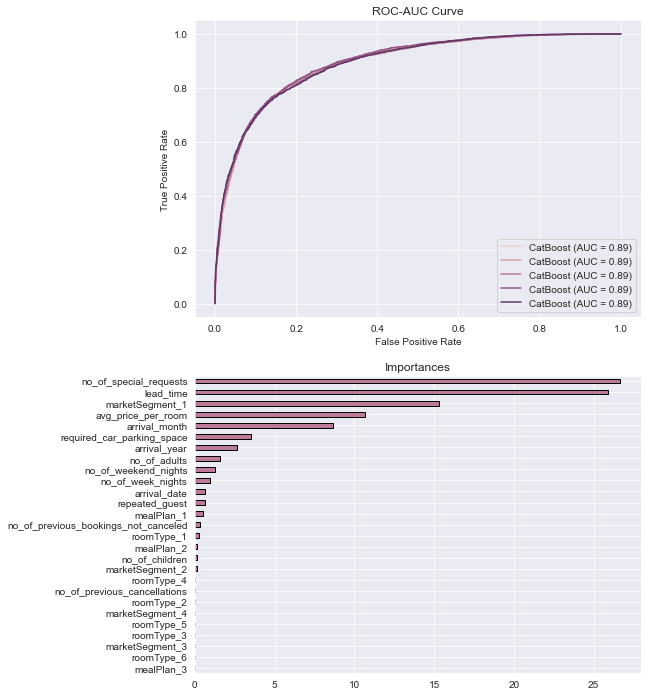

In [36]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 1, figsize=(8,12))
ax[0].set_title('ROC-AUC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate');
ax[1].set_title('Importances')

cat_cv_scores = []
cat_importances = []


skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, y)):
    
    ## Split into train and validation set:
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    
    ## Model:
    
    cat_model = catboost.CatBoostClassifier(max_depth = 7,
                                            learning_rate = 0.01,
                                            n_estimators = 500)
    cat_model.fit(X_train, y_train)
        
    ## Importances:
    cat_importances.append(cat_model.feature_importances_)
    
    ## Prediction and Evaluation:
    cat_pred = cat_model.predict_proba(X_valid)[:, 1]
    cat_cv_scores.append(roc_auc_score(y_valid, cat_pred))
    fpr, tpr, thresholds = roc_curve(y_valid, cat_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'CatBoost')
    display.plot(color = colors[fold], ax = ax[0])
    
    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {cat_cv_scores[-1]}')
    print('----------------------------------------')
    
## Importances:
df_importances = pd.DataFrame(cat_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, ax=ax[1], color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(cat_cv_scores)}')

## 7. Submission 1:

Since all the four models are more or less performing equally well, I will make my prediction on the test set using a combination of all these models.

First I will train these models on the entire `train_full` data:

In [37]:
## Random Forest Classifier:
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

## XGBoost Classifier:
xgb_model = XGBClassifier(max_depth = 7,
                              learning_rate = 0.01,
                              n_estimators = 500,
                              subsample = 0.7,
                              colsample_bytree = 0.7,
                              reg_alpha = 3,
                              reg_lambda = 3)

## LightGBM Classifier:
lgb_model = LGBMClassifier(max_depth = 7,
                              learning_rate = 0.01,
                              n_estimators = 500,
                              subsample = 0.7,
                              colsample_bytree = 0.7,
                              reg_alpha = 3,
                              reg_lambda = 3)

## CatBoost Classifier:
cat_model = catboost.CatBoostClassifier(max_depth = 7,
                                            learning_rate = 0.01,
                                            n_estimators = 500)

In [38]:
## Training the models on the full train data:
rf.fit(X, y)
xgb_model.fit(X, y)
lgb_model.fit(X, y)
cat_model.fit(X, y)

0:	learn: 0.6872177	total: 18.4ms	remaining: 9.17s
1:	learn: 0.6809590	total: 34.6ms	remaining: 8.62s
2:	learn: 0.6751281	total: 51.4ms	remaining: 8.51s
3:	learn: 0.6691381	total: 72.6ms	remaining: 9s
4:	learn: 0.6637436	total: 91.5ms	remaining: 9.06s
5:	learn: 0.6583220	total: 112ms	remaining: 9.21s
6:	learn: 0.6529407	total: 129ms	remaining: 9.12s
7:	learn: 0.6476021	total: 148ms	remaining: 9.09s
8:	learn: 0.6425409	total: 168ms	remaining: 9.18s
9:	learn: 0.6377203	total: 189ms	remaining: 9.28s
10:	learn: 0.6329839	total: 212ms	remaining: 9.44s
11:	learn: 0.6279809	total: 232ms	remaining: 9.44s
12:	learn: 0.6232612	total: 253ms	remaining: 9.47s
13:	learn: 0.6185490	total: 272ms	remaining: 9.44s
14:	learn: 0.6142675	total: 295ms	remaining: 9.52s
15:	learn: 0.6100901	total: 314ms	remaining: 9.5s
16:	learn: 0.6060109	total: 334ms	remaining: 9.49s
17:	learn: 0.6018554	total: 358ms	remaining: 9.6s
18:	learn: 0.5977548	total: 375ms	remaining: 9.5s
19:	learn: 0.5938515	total: 400ms	remainin

162:	learn: 0.4287170	total: 5.3s	remaining: 11s
163:	learn: 0.4284588	total: 5.33s	remaining: 10.9s
164:	learn: 0.4281960	total: 5.38s	remaining: 10.9s
165:	learn: 0.4279580	total: 5.41s	remaining: 10.9s
166:	learn: 0.4276527	total: 5.46s	remaining: 10.9s
167:	learn: 0.4274315	total: 5.51s	remaining: 10.9s
168:	learn: 0.4271812	total: 5.58s	remaining: 10.9s
169:	learn: 0.4269406	total: 5.65s	remaining: 11s
170:	learn: 0.4267432	total: 5.71s	remaining: 11s
171:	learn: 0.4265036	total: 5.79s	remaining: 11s
172:	learn: 0.4262419	total: 5.86s	remaining: 11.1s
173:	learn: 0.4260040	total: 5.92s	remaining: 11.1s
174:	learn: 0.4257714	total: 5.97s	remaining: 11.1s
175:	learn: 0.4255301	total: 6.03s	remaining: 11.1s
176:	learn: 0.4252976	total: 6.08s	remaining: 11.1s
177:	learn: 0.4251079	total: 6.12s	remaining: 11.1s
178:	learn: 0.4249110	total: 6.17s	remaining: 11.1s
179:	learn: 0.4246714	total: 6.21s	remaining: 11s
180:	learn: 0.4244599	total: 6.26s	remaining: 11s
181:	learn: 0.4242392	tot

328:	learn: 0.4055558	total: 9.91s	remaining: 5.15s
329:	learn: 0.4054433	total: 9.94s	remaining: 5.12s
330:	learn: 0.4053667	total: 9.96s	remaining: 5.08s
331:	learn: 0.4053022	total: 9.98s	remaining: 5.05s
332:	learn: 0.4052149	total: 10s	remaining: 5.02s
333:	learn: 0.4051425	total: 10s	remaining: 4.99s
334:	learn: 0.4050588	total: 10.1s	remaining: 4.95s
335:	learn: 0.4049635	total: 10.1s	remaining: 4.92s
336:	learn: 0.4048791	total: 10.1s	remaining: 4.89s
337:	learn: 0.4047988	total: 10.1s	remaining: 4.85s
338:	learn: 0.4047216	total: 10.1s	remaining: 4.82s
339:	learn: 0.4046358	total: 10.2s	remaining: 4.78s
340:	learn: 0.4045434	total: 10.2s	remaining: 4.75s
341:	learn: 0.4044637	total: 10.2s	remaining: 4.72s
342:	learn: 0.4043970	total: 10.2s	remaining: 4.68s
343:	learn: 0.4043055	total: 10.3s	remaining: 4.65s
344:	learn: 0.4042268	total: 10.3s	remaining: 4.62s
345:	learn: 0.4041511	total: 10.3s	remaining: 4.58s
346:	learn: 0.4040817	total: 10.3s	remaining: 4.55s
347:	learn: 0.40

492:	learn: 0.3949929	total: 14.1s	remaining: 200ms
493:	learn: 0.3949503	total: 14.1s	remaining: 172ms
494:	learn: 0.3948918	total: 14.2s	remaining: 143ms
495:	learn: 0.3948443	total: 14.2s	remaining: 114ms
496:	learn: 0.3947944	total: 14.2s	remaining: 85.8ms
497:	learn: 0.3947522	total: 14.2s	remaining: 57.2ms
498:	learn: 0.3946930	total: 14.3s	remaining: 28.6ms
499:	learn: 0.3946387	total: 14.3s	remaining: 0us


In [39]:
## Predictions:
rf_pred = rf.predict_proba(X_test)[:, 1]
xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
lgb_pred = lgb_model.predict_proba(X_test)[:, 1]
cat_pred = cat_model.predict_proba(X_test)[:, 1]

final_pred_1 = (rf_pred + xgb_pred + lgb_pred + cat_pred)/4

submission['booking_status'] = final_pred_1

In [40]:
submission.head()

,id,booking_status
0,42100,0.163952
1,42101,0.045585
2,42102,0.359803
3,42103,0.101913
4,42104,0.498940
